In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.simplefilter('ignore')

In [3]:
data=pd.read_csv('G:\\ML\\Credit_card\\creditcard.csv')

In [4]:
# colum=['V5','V8','V20','V23','V21','V27','V28','V6','V7','V15','V22']
# data.drop(['V5','V8','V20','V23','V21','V27','V28'], axis=1, inplace=True)

In [5]:
data.shape

(284807, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

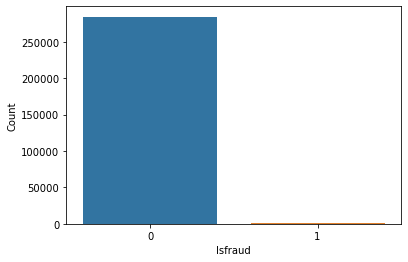

In [9]:

sns.countplot(data['Class'])
plt.xlabel('Isfraud')
plt.ylabel('Count')
plt.show()

In [10]:
df_F= data[ data['Class']==1 ]
df_NF= data[ data['Class']==0 ]


In [11]:
#Indication an highly Imbalaced data set
print(df_F.shape)
print(df_NF.shape)
print(str((df_F.shape[0]/df_NF.shape[0])))

(492, 31)
(284315, 31)
0.0017304750013189597


In [12]:
df_F['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
df_NF['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

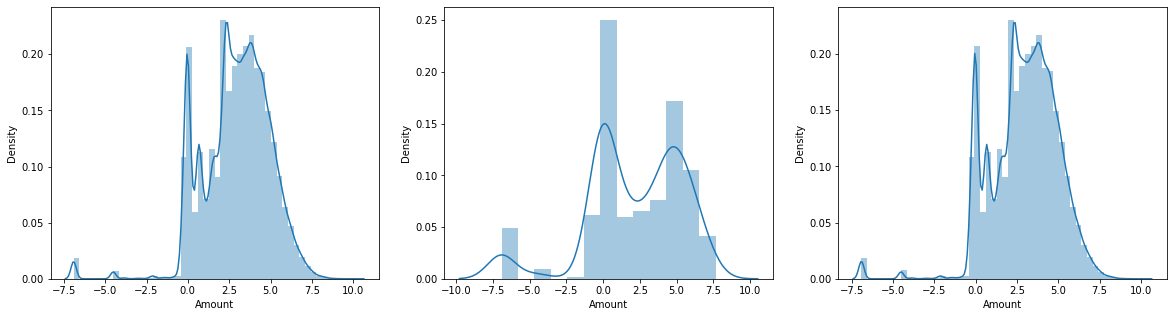

In [14]:
# sns.distplot(df_NF['Amount'])
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(np.log(df_NF['Amount']+0.001))
plt.subplot(1,3,2)
sns.distplot(np.log(df_F['Amount']+0.001))
plt.subplot(1,3,3)
sns.distplot(np.log(data['Amount']+0.001))
plt.show()

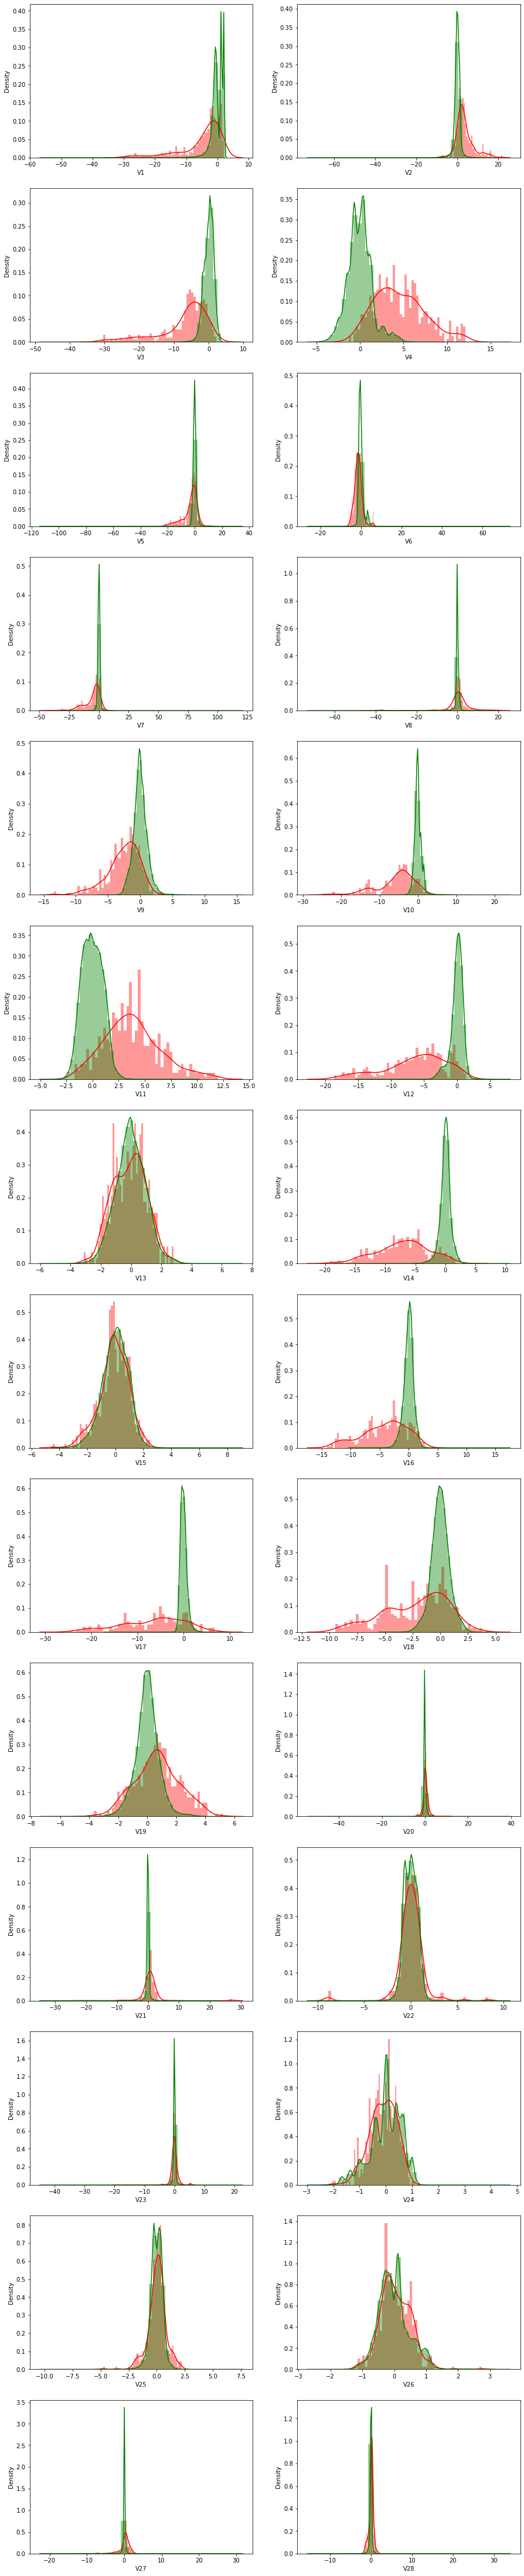

In [15]:
cols = data.iloc[:, 1:29].columns
j = 0
plt.figure(figsize = (15, 80))
for c in cols:
    plt.subplot(14, 2, j+1)
    sns.distplot(df_F[c], bins=50, color = 'r')
    sns.distplot(df_NF[c], bins=50, color = 'g')
    j = j+1
    
plt.show()

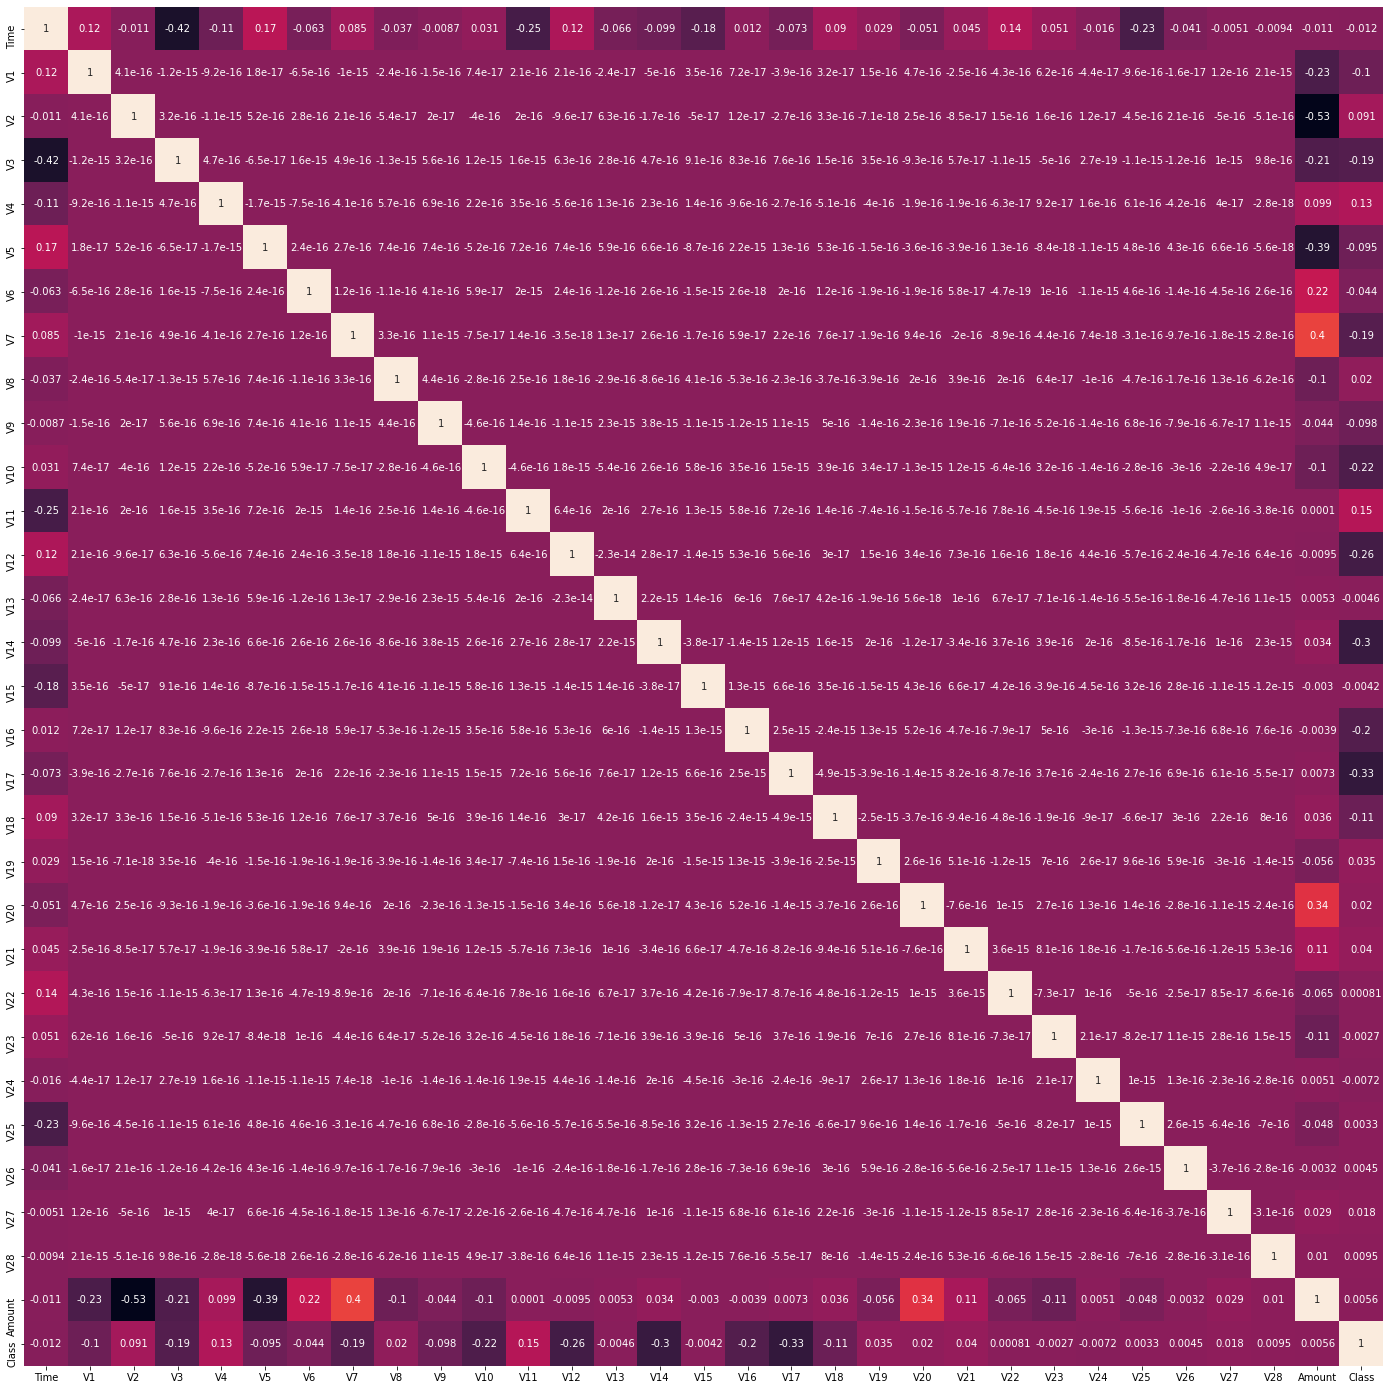

In [16]:
plt.figure(figsize = (25,25))
sns.heatmap(data.corr(),annot=True,square=True,cbar=False)
plt.show()

In [17]:
#Eliminating Features On the Basis of correlational value and distrubution of the data

data_r=data.copy()    #reserving the original data

cols = ['V6','V13', 'V15','V20','V22','V23','V24','V25','V26','V28']
data.drop(cols,axis=1, inplace=True)


In [18]:
data.shape

(284807, 21)

# Balancing the data by Under Sampling 

In [19]:
nf_indexes=df_NF.index
nf_indexes=np.array(nf_indexes)
nf_indexes=np.random.choice(nf_indexes, df_F.shape[0], replace=False)

In [20]:
print(len(nf_indexes))
nf_indexes=np.concatenate((nf_indexes, np.array(df_F.index)), axis=0)

492


In [21]:
#shiffling of all the indexes so that classes are in random sequence
np.random.shuffle(nf_indexes)



In [22]:
udf=data.iloc[nf_indexes,:]

In [23]:
udf['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [24]:
udf

,Time,V1,V2,V3,V4,V5,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V21,V27,Amount,Class
167049,118455.0,-0.277499,0.597133,-1.102748,-1.553160,0.298342,0.673178,0.182410,-1.700842,0.457208,...,-0.244235,1.048739,-1.709026,-0.106203,1.476850,-0.433597,-0.091812,0.258711,12.50,0
241254,150949.0,-2.423535,1.659093,-3.071421,2.588033,1.135791,-2.588418,-2.226592,-1.670173,-3.508925,...,-1.959927,-4.978118,-0.997477,-0.817261,0.307798,0.028485,-0.934127,0.150156,9.29,1
151006,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-31.197329,-11.438920,-9.462573,-22.187089,...,-10.592305,-3.926207,-6.809890,-12.462315,-5.501051,-0.567940,-8.755698,-7.263482,1.00,1
270680,164206.0,2.103556,0.120091,-2.011535,0.384001,0.400104,0.191894,-0.294515,0.792536,-0.441285,...,-0.705617,-0.567324,0.451871,0.203573,0.850129,-0.165501,0.138959,-0.010079,4.31,0
26403,34049.0,1.291782,-1.445020,0.696149,-1.497140,-1.602733,-1.416433,0.207175,-1.731385,1.510311,...,-0.479188,-0.187666,-0.055013,0.315401,0.381565,-0.314524,-0.144840,0.051688,82.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64781,51302.0,-0.044266,-0.297692,1.698534,-1.952151,-1.272596,-0.358435,-0.067072,-2.250286,0.998653,...,-1.771660,-0.181486,-0.319023,0.557868,0.079883,0.021002,-0.390407,0.079733,10.60,0
124996,77499.0,1.086739,0.123917,0.501729,1.336206,-0.210021,-0.019976,0.118297,0.026628,0.041080,...,1.250211,0.290992,-0.582129,0.091758,-0.539466,-0.158267,-0.030945,0.033963,19.01,0
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.413170,0.248525,-1.127396,-3.232153,...,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505,0.737657,0.370612,0.389152,0.76,1
223712,143493.0,0.116534,0.430476,0.987805,-0.207572,-0.135339,0.231753,-0.010197,0.722649,-0.664925,...,0.152037,-0.261589,-0.110526,-0.526746,0.462086,0.124063,0.360280,0.327283,9.99,0


In [25]:
#Scaling the features of the Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# new_udf=scaler.fit_transform(udf)
udf[udf.drop(['Class'],axis=1).columns] = scaler.fit_transform(udf[udf.drop(['Class'],axis=1).columns])

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


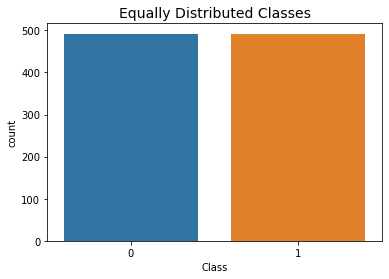

In [26]:
print('Distribution of the Classes in the subsample dataset')
print(udf['Class'].value_counts()/len(udf))



sns.countplot('Class', data=udf)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# Analysing the features for outliers with significant correlational value with Class

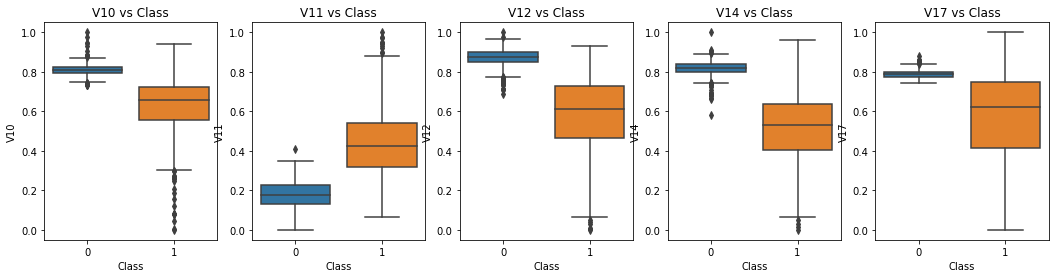

In [27]:
feat=['V10','V11','V12','V14','V17']
f, axes = plt.subplots(ncols=5, figsize=(18,4))
for j in range(0,5):
    sns.boxplot(x="Class", y=feat[j], data=udf, ax=axes[j])
    axes[j].set_title(str(feat[j])+' vs Class')

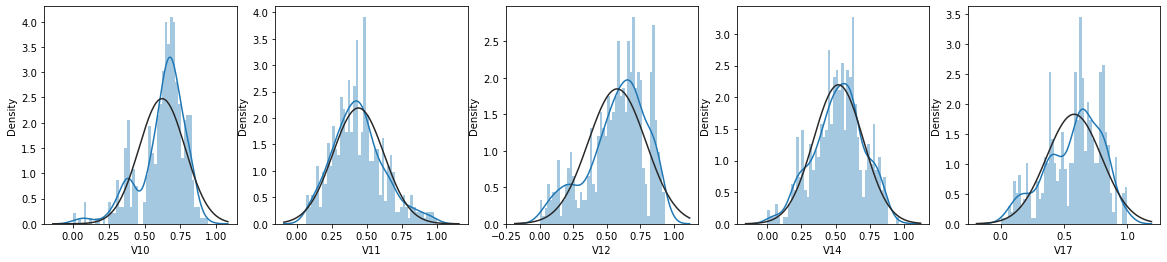

In [28]:
# cols = data.iloc[:, 1:29].columns
from scipy.stats import norm
j = 0
plt.figure(figsize = (20,4))
for c in feat:
    plt.subplot(1,5,j+1)
    
    sns.distplot(udf[udf['Class']==1][c], bins=50,fit=norm)
    j = j+1
    
plt.show()

In [29]:
feat=['V10','V11','V12','V14','V17']
len(feat)

5

In [30]:
def outliers_lim(features):
    q25, q75 = np.percentile(features, 25), np.percentile(features, 75)
    iqr=q75-q25
    Upper_cut=q75+iqr*1.7
    lower_cut=q25-iqr*1.7
    return Upper_cut, lower_cut
Initial_features=udf.shape[0]
for i in range(0,len(feat)):
    Upper_cut, lower_cut= outliers_lim(udf[feat[i]])
    outcheck = udf[feat[i]].loc[udf['Class'] == 1].values
    outliers = [x for x in outcheck if( x > Upper_cut or x < lower_cut)]
    print('Feature ' +str(feat[i])+ ' Outliers for Fraud Cases: {}'.format(len(outliers)))
    new_udf = udf.drop(udf[(udf[feat[i]] > Upper_cut) | (udf[feat[i]] < lower_cut)].index)

Feature V10 Outliers for Fraud Cases: 67
Feature V11 Outliers for Fraud Cases: 13
Feature V12 Outliers for Fraud Cases: 30
Feature V14 Outliers for Fraud Cases: 3
Feature V17 Outliers for Fraud Cases: 63


In [31]:
print('The number of outliers removed:'+str(Initial_features-new_udf.shape[0]))

The number of outliers removed:63


In [32]:
udf=new_udf
udf.shape

(921, 21)

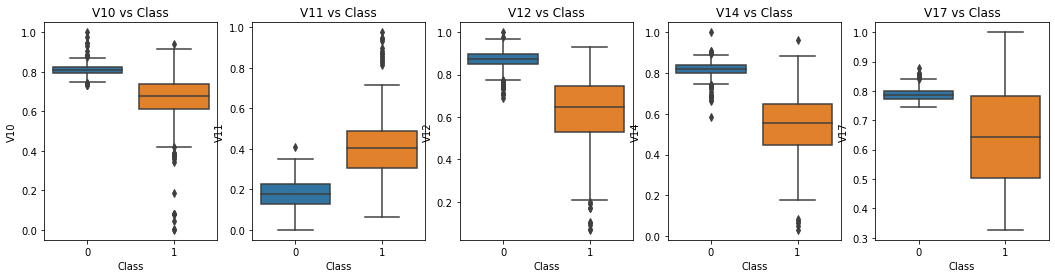

In [33]:
f, axes = plt.subplots(ncols=5, figsize=(18,4))
for j in range(0,5):
    sns.boxplot(x="Class", y=feat[j], data=udf, ax=axes[j])
    axes[j].set_title(str(feat[j])+' vs Class')

#### Much less Outliers than Before

In [34]:
udf.describe()

,Time,V1,V2,V3,V4,V5,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V21,V27,Amount,Class
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,...,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,0.522578,0.872654,0.341914,0.822988,0.347749,0.634888,0.705040,0.673389,0.691488,0.741306,...,0.757599,0.692568,0.734048,0.718991,0.665364,0.433459,0.462259,0.716142,0.030974,0.465798
std,0.279126,0.153875,0.110216,0.162854,0.183155,0.110756,0.085145,0.077378,0.106244,0.118222,...,0.167172,0.175871,0.149975,0.135867,0.133662,0.127875,0.055257,0.088203,0.074186,0.499100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067539,0.030619,0.202690,0.326557,0.263253,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292959,0.857829,0.288665,0.783740,0.215260,0.623332,0.699178,0.668245,0.643037,0.682743,...,0.656152,0.568173,0.663697,0.652833,0.624447,0.356717,0.452070,0.698993,0.000364,0.000000
50%,0.481534,0.909424,0.323116,0.871325,0.301526,0.656346,0.729483,0.673756,0.715178,0.787884,...,0.836393,0.786899,0.789107,0.776039,0.697823,0.428838,0.458330,0.709471,0.005361,0.000000
75%,0.787530,0.961565,0.367646,0.914598,0.460008,0.683558,0.744432,0.683859,0.756958,0.812870,...,0.878864,0.822490,0.837870,0.798351,0.746479,0.502879,0.467032,0.745908,0.028198,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.843399,1.000000,0.966480,1.000000,1.000000


In [35]:
udf["Class"].value_counts()

0    492
1    429
Name: Class, dtype: int64

In [36]:
y=udf['Class']
X=udf.drop(['Class'],axis=1)
print(X.shape)
print(y.shape)

(921, 20)
(921,)


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC_Linear', SVC(kernel='linear')))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score


names = []
scores = []
recall=[]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    names.append(name)
    print(name)
    print(classification_report(y_test, y_pred))
tr_split = pd.DataFrame({'Name': names, 'Score': scores, 'Recall': recall})
print(tr_split.sort_values(by=['Recall']))





KNN
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        97
           1       0.96      0.88      0.92        88

    accuracy                           0.92       185
   macro avg       0.93      0.92      0.92       185
weighted avg       0.93      0.92      0.92       185

SVC_Linear
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        97
           1       1.00      0.86      0.93        88

    accuracy                           0.94       185
   macro avg       0.94      0.93      0.93       185
weighted avg       0.94      0.94      0.93       185

LR
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        97
           1       1.00      0.88      0.93        88

    accuracy                           0.94       185
   macro avg       0.95      0.94      0.94       185
weighted avg       0.95      0.94      0.94       185

D

### Applying Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
parameters_svc = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
              {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001,0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}] 
grid_SVC = GridSearchCV(estimator = svc,param_grid = parameters_svc,scoring = 'recall',cv = 10,n_jobs = -1)
grid_SVC.fit(X_train,y_train)
best_accuracy = grid_SVC.best_score_
best_parameters = grid_SVC.best_params_
print('Grid best parameter (max. recall): ', grid_SVC.best_params_)
print('Grid best score (recall): ', grid_SVC.best_score_)
para_SVC=grid_SVC.best_params_

Grid best parameter (max. recall):  {'C': 100, 'gamma': 0.3, 'kernel': 'rbf'}
Grid best score (recall):  0.8738655462184874


In [40]:
parameters_KNN={"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],}
grid_KNN = GridSearchCV(estimator =KNeighborsClassifier(),param_grid = parameters_KNN,scoring = 'recall',cv = 10,n_jobs = -1)
grid_KNN.fit(X_train,y_train)
best_accuracy = grid_KNN.best_score_
best_parameters = grid_KNN.best_params_
print('Grid best parameter (max. recall): ', grid_KNN.best_params_)
print('Grid best score (recall): ', grid_KNN.best_score_)
para_KNN=grid_KNN.best_params_

Grid best parameter (max. recall):  {'algorithm': 'auto', 'n_neighbors': 3}
Grid best score (recall):  0.8679831932773109


In [41]:
parameter_tree = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

grid_tree = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = parameter_tree,scoring = 'recall',cv = 10,n_jobs = -1)
grid_tree.fit(X_train,y_train)
grid_tree.fit(X_train,y_train)
print('Grid best parameter (max. recall): ', grid_tree.best_params_)
print('Grid best score (recall): ', grid_tree.best_score_)
para_tree=grid_tree.best_estimator_

Grid best parameter (max. recall):  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Grid best score (recall):  0.8590756302521008


In [42]:
parameter_RF = {'n_estimators': [100, 300, 500, 800, 1200], "max_depth": [5, 8, 15, 25, 30], 
              "min_samples_split": [2, 5, 10, 15, 60, 100],'min_samples_leaf' : [1, 2, 5, 10]}
# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10

grid_RF = GridSearchCV(estimator = RandomForestClassifier(),param_grid = parameter_RF,scoring = 'recall',cv = 10,n_jobs = -1)
grid_RF.fit(X_train,y_train)
grid_RF.fit(X_train,y_train)
print('Grid best parameter (max. recall): ', grid_RF.best_params_)
print('Grid best score (recall): ', grid_RF.best_score_)
para_RF=grid_RF.best_params_

Grid best parameter (max. recall):  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Grid best score (recall):  0.894453781512605


In [43]:
SVC_F=SVC(kernel='rbf',C=100, gamma=0.1)
SVC_F.fit(X_train,y_train)
y_SVC_pred=SVC_F.predict(X_test)
print(classification_report(y_test, y_SVC_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        97
           1       0.99      0.89      0.93        88

    accuracy                           0.94       185
   macro avg       0.95      0.94      0.94       185
weighted avg       0.94      0.94      0.94       185



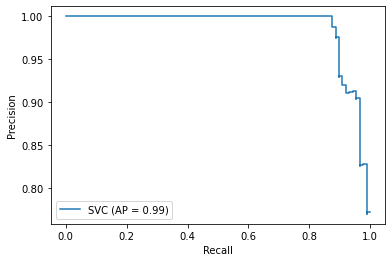

In [44]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(SVC_F, X_test, y_test)

In [45]:
KNN_F=KNeighborsClassifier(algorithm='auto',n_neighbors=3)
KNN_F.fit(X_train,y_train)
y_KNN_pred=KNN_F.predict(X_test)
print(classification_report(y_test, y_KNN_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.93        97
           1       0.95      0.88      0.91        88

    accuracy                           0.92       185
   macro avg       0.92      0.92      0.92       185
weighted avg       0.92      0.92      0.92       185



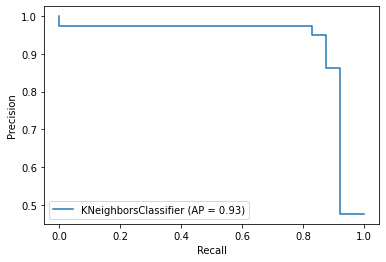

In [46]:

plot_precision_recall_curve(KNN_F, X_test, y_test)

In [47]:
DT_F=DecisionTreeClassifier(criterion='entropy', max_depth= 3, min_samples_leaf=6)
DT_F.fit(X_train,y_train)
y_pred_DT=DT_F.predict(X_test)
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        97
           1       1.00      0.84      0.91        88

    accuracy                           0.92       185
   macro avg       0.94      0.92      0.92       185
weighted avg       0.93      0.92      0.92       185



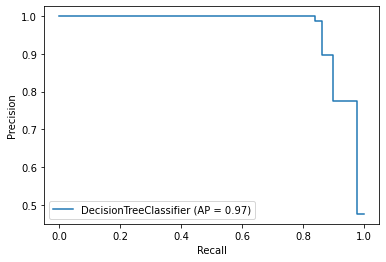

In [48]:
plot_precision_recall_curve(DT_F, X_test, y_test)

In [51]:
RF_F=RandomForestClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split=5,n_estimators= 300)
RF_F.fit(X_train,y_train)
y_pred_RF=RF_F.predict(X_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        97
           1       0.96      0.90      0.93        88

    accuracy                           0.94       185
   macro avg       0.94      0.93      0.93       185
weighted avg       0.94      0.94      0.93       185



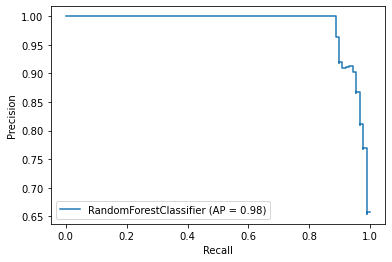

In [52]:
plot_precision_recall_curve(RF_F, X_test, y_test)

#### My Conclusion:
#### 1.Good prediction results can be achieved with imbalanced datasets(better precision) as well as with balanced ones(better recall) 
#### 2.Random Forest and Decision Tree gave us the best results being able to detect more than 92%(recall) fraud transactions and at the same time not classifying a lot of non-fraud transactions as fraud 
#### 3.There is no perfect model and there will always be a trade-off between precision and recall. It is up to the company and its objectives to decide which approach is the best in each particular situation

In [ ]:
# # from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_predlog))
# print(classification_report(y_test,y_predlog))

In [ ]:
# data['Amt']=sc.fit_transform(udf['Amount'].values.reshape(-1,1))
# data['T']=sc.fit_transform(udf['Time'].values.reshape(-1,1))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# data['Amt']=sc.fit_transform(data['Amount'].values.reshape(-1,1))
# data['T']=sc.fit_transform(data['Time'].values.reshape(-1,1))
# data.shape

In [ ]:
# data['Amt']=sc.fit_transform(udf['Amount'].values.reshape(-1,1))
# # data['T']=sc.fit_transform(udf['Time'].values.reshape(-1,1))

In [ ]:
# X1=data.drop(['Class'],axis=1)
# Y1=data['Class']

In [ ]:
# y_predlg=log.predict(X1)

In [ ]:
# print(confusion_matrix(Y1,y_predlg))
# print(classification_report(Y1,y_predlg))

In [ ]:
# from sklearn.svm import SVC
# svc = SVC()

In [ ]:
# X_train.shape

In [ ]:
# svc.fit(X_train,y_train)

In [ ]:
# y_predsvl=svc.predict(X_test)

In [ ]:
# print(confusion_matrix(y_test,y_predsvl))
# print(classification_report(y_test,y_predsvl))

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(svc, X_test, y_test)  
# plt.show() 

In [ ]:
# y_predsvl1=svc.predict(X1)
# print(confusion_matrix(Y1,y_predsvl1))
# print(classification_report(Y1,y_predsvl1))

In [ ]:
# plot_confusion_matrix(svc, X1, Y1)  
# plt.show() 

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# data['Amt']=sc.fit_transform(data['Amount'].values.reshape(-1,1))
# data['T']=sc.fit_transform(data['Time'].values.reshape(-1,1))
# data.shape

# data=data.drop(['Amount','Time'],axis=1)
# data.shape

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.optimizers import Adam

In [ ]:
# X_train.shape

In [ ]:
# def create_model():
#     model = Sequential()
#     model.add(Dense(units=23, kernel_initializer='normal', activation='relu'))
    
# #     model.add(Dense(100, kernel_initializer='normal', activation='selu'))
#     model.add(Dense(8, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
    
#     model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#     return model


In [ ]:
# model = KerasClassifier(build_fn = create_model, epochs = 25, verbose = 0)
# batch_size = 200,

In [ ]:
# model.fit(X_train, y_train, epochs = 25,batch_size = 1)

In [ ]:
# y_preddl=model.predict(X_test)

In [ ]:
# print(confusion_matrix(y_test,y_preddl))
# print(classification_report(y_test,y_preddl))

In [ ]:
# y_preddl1=model.predict(X1)

In [ ]:
# print(confusion_matrix(Y1,y_preddl1))
# print(classification_report(Y1,y_preddl1))

In [ ]:
# udf.to_csv('Desktop\\DATA.csv')

In [ ]:
# udf.columns